In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

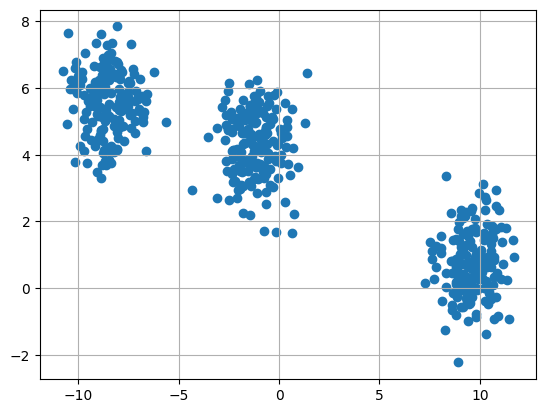

In [3]:
X, y = make_blobs(n_samples= 500, n_features= 2, centers= 3, random_state=7)

plt.figure(0)
plt.scatter(X[:, 0], X[:, 1])
plt.grid(True)
plt.show()

## Without Scikit-Learn

*Initializes three clusters for K-means clustering.*
*It sets a random seed and generates random cluster centers within a specified range and creates an empty list of points for each cluster.*

In [4]:
k = 3
clusters = {}
np.random.seed(7)

for idx in range(k):
    center = 2 * ( 2 * np.random.random((X.shape[1], )) - 1)
    points = []
    cluster = {
        'center': center,
        'points': []
    }

    clusters[idx] = cluster

clusters

{0: {'center': array([-1.69476684,  1.11967517]), 'points': []},
 1: {'center': array([-0.24636307,  0.89386071]), 'points': []},
 2: {'center': array([1.91195805, 0.15398348]), 'points': []}}

*Plotting random initialize center with data points*

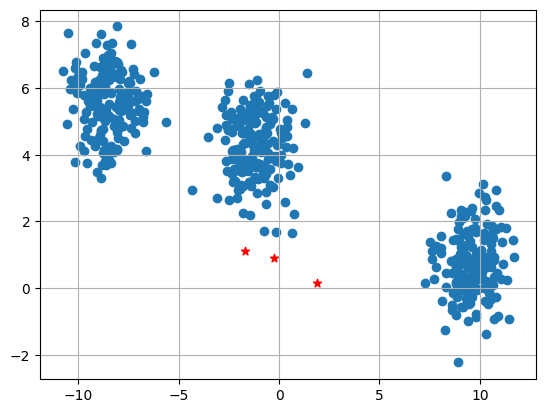

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.grid(True)

for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='*', c='red')

plt.show()

*Define Euclidean Distance*

In [6]:
def distance(p1, p2):
    return np.sqrt(np.sum((p1- p2)**2))

*Creating function Assign and Update the cluster center*

In [7]:
def assign_clusters(X, clusters):
    for idx in range(X.shape[1]):
        dist = []
        curr_x = X[idx]
    
        for i in range(k):
            dist.append(distance(curr_x, clusters[i]['center']))

        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters


def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis= 0)
            clusters[i]['center'] = new_center
            clusters[i]['points'] = []

    return clusters

*Creating function to Predict the cluster for the datapoints*

In [8]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i], clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

*Assign, Update and predict the cluster center*

In [10]:
clusters = assign_clusters(X, clusters)
clusters = update_clusters(X, clusters)
pred = pred_cluster(X, clusters)

*Plotting data points with their predicted cluster center*

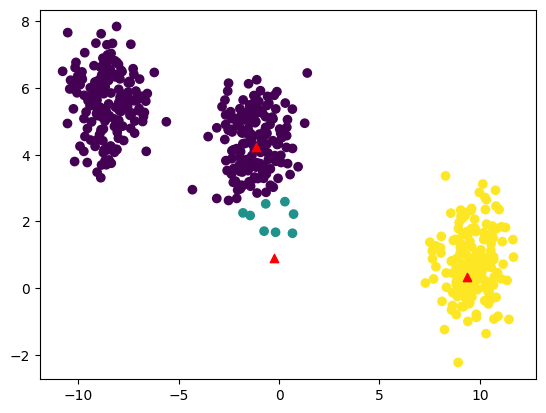

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='^', c='red')
plt.show()

## With Scikit-Learn

In [12]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=7)
Y = kmeans.fit_predict(X)
Y

array([1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0,
       2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2,
       2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 1, 2, 0, 0, 1, 1, 1,
       0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1,
       2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 0, 0,
       1, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 0, 1, 1, 0, 2, 2, 2,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0, 2, 0,
       1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 2,
       0, 1, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 1, 2, 0,
       1, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 1, 2, 0, 2, 2, 0,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2,
       2, 0, 1, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1,

*KMeans instance preserves a
 copy of the labels of the instances it was trained on, available via the labels_ instance
 variable*

In [13]:
Y is kmeans.labels_

True

In [14]:
kmeans.cluster_centers_

array([[-1.20408271,  4.32181805],
       [ 9.61912052,  0.74366381],
       [-8.5060831 ,  5.54419349]])

*assign new instances to the cluster whose centroid is closest*

In [15]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 0, 0])

*the transform() method measures
 the distance from each instance to every centroid*

In [16]:
kmeans.transform(X_new)

array([[ 2.61546444,  9.7008175 ,  9.21492036],
       [ 4.80261913,  6.73729449, 12.03957042],
       [ 2.22991522, 12.81925332,  6.06546549],
       [ 2.55819075, 12.7407582 ,  6.29158685]])

*If you have a high-dimensional
 dataset and you transform it this way, you end up with a k-dimensional dataset: this
 transformation can be a very efficient nonlinear dimensionality reduction technique*